# XGBoost KD Classifier

In [1]:
# Imports
import sys
sys.path.append('../') # Make parent folder visible
from preprocess import load_data
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle as pkl
from xgbst.xgboost_model import XGBoostKDModel
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, recall_score, precision_score, roc_curve
import numpy as np

# Load data
x_train, x_test, y_train, y_test = load_data.load(one_hot=False)

In [2]:
# Feature normalization
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [4]:
# Init model
clf = XGBoostKDModel(data_folder='../data/')

# Set hyperparameters (found via hyperparameter optimization)
clf.param['eta'] = .287
clf.param['max_depth'] = 10
clf.param['min_child_weight'] = 1
clf.param['subsample'] = .967
clf.param['colsample_bytree'] = .6706
clf.num_round=8

# Train model
y_pred = clf.train_test(x_train, x_test, y_train, y_test)
y_prob = clf.predict(x_test)

In [5]:
# Evaluate predictions
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))
print('ROC AUC: ', roc_auc_score(y_test, y_prob))

Accuracy:  0.920529801325
Precision:  0.926923076923
Recall:  0.979674796748
F1 Score:  0.95256916996
ROC AUC:  0.961817653891


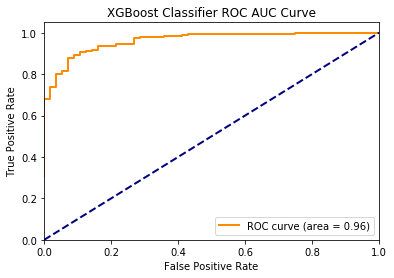

In [7]:
# Plot ROC Curve
roc = roc_curve(y_test, y_prob)
fpr, tpr, thresholds = roc
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_prob))
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier ROC AUC Curve')
plt.legend(loc="lower right")
plt.show()